# Introduction to OpenCV

## Getting started 

In [1]:
# These imports let you use opencv
import cv2 #opencv itself
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (5, 5) # this controls figure size in the notebook



Now we can open an image:

In [2]:
input_image=cv2.imread('noidea.jpg')
type(input_image)

numpy.ndarray

We can find out various things about that image

In [3]:
print(input_image.size)

776250


In [4]:
print(input_image.shape)

(414, 625, 3)


In [5]:
print(input_image.dtype)

uint8


In [5]:
cv2.imshow("image", input_image)
#cv2.waitKey()

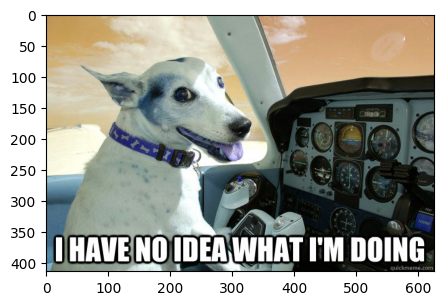

In [6]:
plt.imshow(input_image)

**Note**. Here another issue with conventions. OpenCV expect images to be stored as BGR, but matplotlib expected to be RGB.

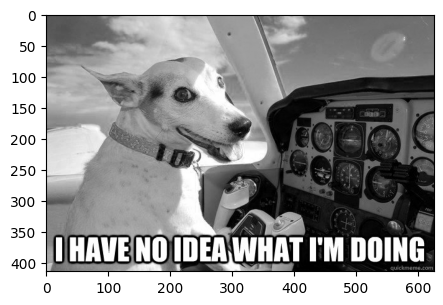

In [8]:
# split channels
b,g,r=cv2.split(input_image)
# show one of the channels (this is red - see that the sky is kind of dark. try changing it to b)
plt.imshow(r, cmap='gray')


In [9]:
b.shape

(414, 625)

## converting between colour spaces, merging and splitting channels

We can convert between various colourspaces in OpenCV easily. We've seen how to split, above. We can also merge channels:

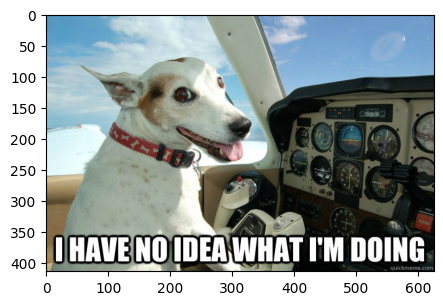

In [10]:
image=cv2.merge([r,g,b])
# merge takes an array of single channel matrices
plt.imshow(image)


OpenCV also has a function specifically for dealing with image colorspaces, so rather than split and merge channels by hand you can use this instead. It is usually marginally faster...

In [12]:
COLORflags = [flag for flag in dir(cv2) if flag.startswith('COLOR') ]
print(len(COLORflags))

# If you want to see them all, rather than just a count uncomment the following line
print(COLORflags)

396
['COLORMAP_AUTUMN', 'COLORMAP_BONE', 'COLORMAP_CIVIDIS', 'COLORMAP_COOL', 'COLORMAP_DEEPGREEN', 'COLORMAP_HOT', 'COLORMAP_HSV', 'COLORMAP_INFERNO', 'COLORMAP_JET', 'COLORMAP_MAGMA', 'COLORMAP_OCEAN', 'COLORMAP_PARULA', 'COLORMAP_PINK', 'COLORMAP_PLASMA', 'COLORMAP_RAINBOW', 'COLORMAP_SPRING', 'COLORMAP_SUMMER', 'COLORMAP_TURBO', 'COLORMAP_TWILIGHT', 'COLORMAP_TWILIGHT_SHIFTED', 'COLORMAP_VIRIDIS', 'COLORMAP_WINTER', 'COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BA

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

def plot_images(images, titles=None, figsize=(10, 6), cmap="gray"):
    if titles is None:
        titles = " " * len(images)
    fig, axes = plt.subplots(len(images), 1, figsize=figsize)

    for i, (image, title) in enumerate(zip(images, titles)):
        axes[i].imshow(image, cmap)
        axes[i].axis('off')
        axes[i].set_title(title)

    plt.tight_layout()
    plt.show()

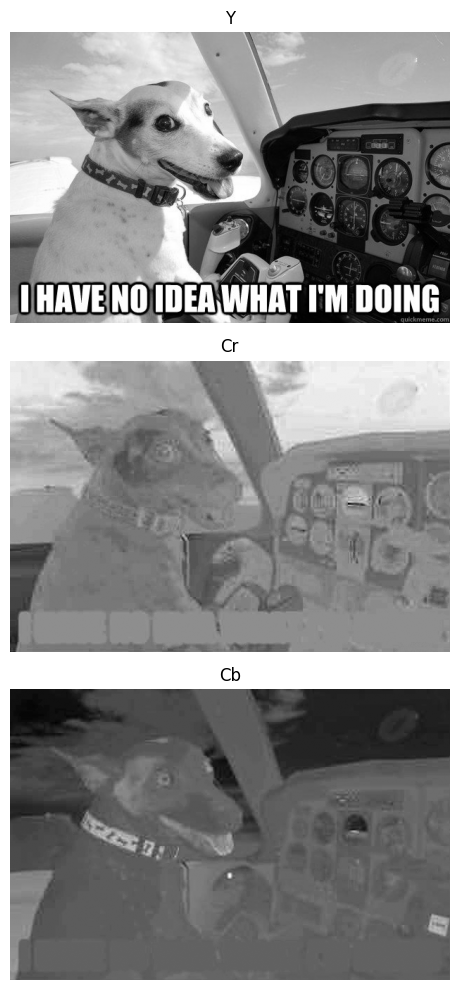

In [14]:
hsv_image=cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
x, y, z =cv2.split(hsv_image)
plot_images([x, y, z], ["Y", "Cr", "Cb"], (10, 10))

## Getting and setting regions of an image

In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to get a region of interest to work on.

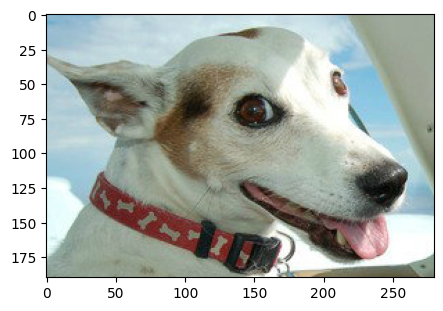

In [15]:
dogface = image[60:250, 70:350]
plt.imshow(dogface)

190
280


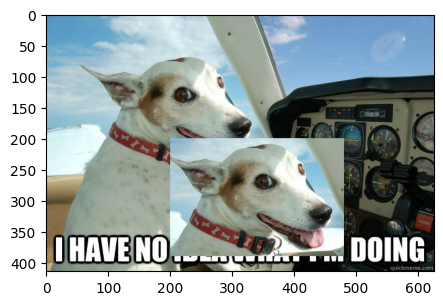

In [16]:
fresh_image=image.copy()
fresh_image[200:200+dogface.shape[0], 200:200+dogface.shape[1]]=dogface
print(dogface.shape[0])
print(dogface.shape[1])
plt.imshow(fresh_image)

## Matrix slicing
In OpenCV python style, as I have mentioned, images are numpy arrays. 

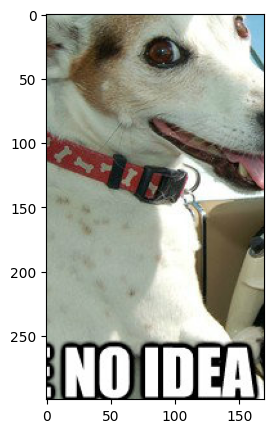

In [17]:
freshim2 = image.copy()
crop = freshim2[100:400, 130:300]
plt.imshow(crop)

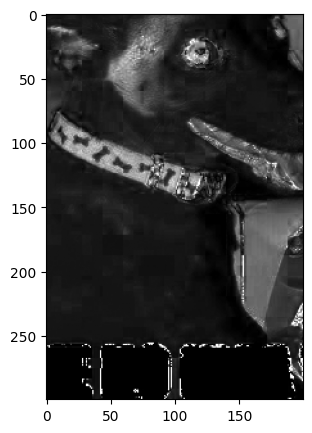

In [18]:
hsvim=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
bcrop =hsvim[100:400, 100:300, 1]
plt.imshow(bcrop, cmap="gray")

## Image stats and image processing

### Basic manipulations

Rotate, flip...

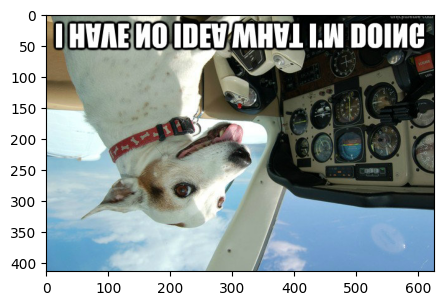

In [19]:
flipped_code_0=cv2.flip(image,0) # vertical flip
plt.imshow(flipped_code_0)

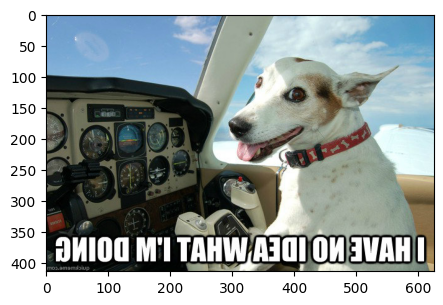

In [20]:
flipped_code_1=cv2.flip(image,1) # horizontal flip
plt.imshow(flipped_code_1)

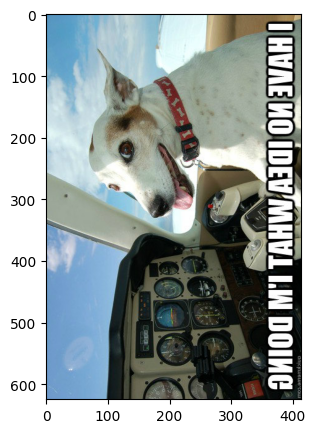

: 

In [ ]:
transposed=cv2.transpose(image)
plt.imshow(transposed)

### Arithmetic operations on images

OpenCV has a lot of functions for doing mathematics on images.
- Usually better that doing matrix operations


In [ ]:
#First create an image the same size as our input
blank_image = np.zeros((input_image.shape), np.uint8)

blank_image[100:200,100:200,2]=255; #give it a green square

new_image=cv2.add(blank_image,input_image) # add the two images together

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
img3 = input_image.copy()
img3[100:200,100:200,2] = 0
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

### Noise reduction
Noise reduction usually involves blurring/smoothing an image using a Gaussian kernel.
The width of the kernel determines the amount of smoothing.

In [ ]:
d=3
img_blur3 = cv2.GaussianBlur(image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
plot_images([image, img_blur3])

In [ ]:
d=5
blured = cv2.GaussianBlur(image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(blured)

In [ ]:
d=20
blured = cv2.GaussianBlur(image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(blured)

### Edge detection

In [ ]:
sobelimage=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(sobelimage,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(sobelimage,cv2.CV_64F,0,1,ksize=9)
plt.imshow(sobely,cmap = 'gray')
# Sobel works in x and in y, change sobelx to sobely in the olt line above to see the difference


In [ ]:
np.min(sobelx), np.max(sobelx)

Canny edge detection is another winnning technique - it takes two thresholds.
The first one determines how likely Canny is to find an edge, and the second determines how likely it is to follow that edge once it's found. Investigate the effect of these thresholds by altering the values below.

In [ ]:
th1=30
th2=60 # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting with this...
d=3 # gaussian blur

edgeresult=image.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

edge = cv2.Canny(edgeresult, th1, th2)

edgeresult[edge != 0] = (0, 255, 0) # this takes pixels in edgeresult where edge non-zero colours them bright green

plt.imshow(edgeresult)

In [ ]:
plt.imshow(edge)
np.min(edge), np.max(edge)

## Features in computer vision

Features are image locations that are "easy" to find in the future. 

### Corner detectors
If you think of edges as being lines, then corners are an obvious choice for features as they represent the intersection of two lines.

In [ ]:
harris_test=input_image.copy()
#greyscale it
gray = cv2.cvtColor(harris_test,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small

# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold

#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_test[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(cv2.cvtColor(harris_test, cv2.COLOR_BGR2RGB))

## Moving towards feature space
When we consider modern feature detectors there are a few things we need to mention. What makes a good feature includes the following:

* Repeatability (got to be able to find it again)
* Distinctiveness/informativeness (features representing different things need to be different)
* Locality (they need to be local to the image feature and not, like, the whole image)
* Quantity (you need to be able to find enough of them for them to be properly useful)
* Accuracy (they need to accurately locate the image feature)
* Efficiency (they've got to be computable in reasonable time)

In [ ]:
orbimg=input_image.copy()

orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(orbimg,None)
# compute the descriptors with ORB
kp, des = orb.compute(orbimg, kp)
# draw keypoints
cv2.drawKeypoints(orbimg,kp,orbimg)

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(cv2.cvtColor(orbimg, cv2.COLOR_BGR2RGB))
plt.show()

## Matching features
Finding features is one thing but actually we want to use them for matching.
First let's get something where we know there's going to be a match


In [ ]:
img2match=np.zeros(input_image.shape,np.uint8)
dogface=input_image[60:250, 70:350] # copy out a bit
img2match[60:250,70:350]=[0,0,0] # blank that region
dogface=cv2.flip(dogface,0) #flip the copy
img2match[200:200+dogface.shape[0], 200:200+dogface.shape[1]]=dogface # paste it back somewhere else

plt.imshow(cv2.cvtColor(img2match, cv2.COLOR_BGR2RGB))

## Matching keypoints

The feature matching function (in this case Orb) detects and then computes keypoint descriptors. These are a higher dimensional representation of the image region immediately around a point of interest (sometimes literally called "interest points").

In [ ]:

kp2 = orb.detect(img2match,None)
# compute the descriptors with ORB
kp2, des2 = orb.compute(img2match, kp2)
# create BFMatcher object: this is a Brute Force matching object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des,des2)

# Sort them by distance between matches in feature space - so the best matches are first.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 50 matches.
oimg = cv2.drawMatches(orbimg,kp,img2match,kp2,matches[:50], orbimg)

fig, ax = plt.subplots(figsize=(10, 8))
plt.imshow(cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB))
plt.show()


As you can see there are some false matches, but it's fairly clear that most of the matched keypoints found are actual matches between image regions on the dogface.

To be more precise about our matching we could choose to enforce **homography** constraints, which looks for features than sit on the same plane. 

# Space colors

In [ ]:
image = cv2.imread('images/two-cubes.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
def show_all_image_components(image):
    plt.imshow(image[:,:,0], cmap='gray')
    plt.axis('off')
    plt.show()
    plt.imshow(image[:,:,1], cmap='gray')
    plt.axis('off')
    plt.show()
    plt.imshow(image[:,:,2], cmap='gray')
    plt.axis('off')
    plt.show()

plt.imshow(image)
plt.axis('off')
plt.show()
show_all_image_components(image)

In [ ]:
# HSV
plt.imshow(image)
plt.show()
show_all_image_components(cv2.cvtColor(image, cv2.COLOR_RGB2HSV))

In [ ]:
# Lab ... light, green-red axis, blue-yellow axis ...
plt.imshow(image)
plt.show()
show_all_image_components(cv2.cvtColor(image, cv2.COLOR_RGB2LAB))

In [ ]:
# Lab ... luminance, red, blue
plt.imshow(image)
plt.show()
show_all_image_components(cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb))

# Real examples
## Bean seed

In [ ]:
image = cv2.imread('images/frijoles.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
lower_white = np.array([130, 130, 130])  # In BGR format
upper_white = np.array([255, 255, 255])
mask = cv2.inRange(image, lower_white, upper_white)
contours, _ = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Step 5: Filter large components by area
min_area = 600  # Adjust based on your needs
max_area = 20000
large_components = [cnt for cnt in contours if max_area > cv2.contourArea(cnt) > min_area]

# Step 6: Draw large components on the original image
output = image.copy()
cv2.drawContours(output, large_components, -1, (255, 0, 0), thickness=cv2.FILLED)  # Draw in green for visualization
plt.figure(figsize=(10, 10))
plt.title("segmented")
plt.imshow(output)
plt.axis('off')

plt.show()

In [ ]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv[:,:,0], cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(hsv[:,:,1], cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(hsv[:,:,2], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
lower_white = np.array([0, 0, 150])  # Lower bound for white
upper_white = np.array([180, 55, 255])  # Upper bound for white
mask = cv2.inRange(hsv, lower_white, upper_white)

contours, _ = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
min_area = 200  # Adjust based on your needs
max_area = 20000
large_components = [cnt for cnt in contours if max_area > cv2.contourArea(cnt) > min_area]

output = image.copy()
cv2.drawContours(output, large_components, -1, (255, 0, 0), thickness=cv2.FILLED)  # Draw in green for visualization
plt.figure(figsize=(10, 10))
plt.title("segmented")
plt.imshow(output)
plt.axis('off')

plt.show()

In [ ]:
lower_yellow = np.array([20, 50, 100])  
upper_yellow = np.array([40, 255, 255]) 
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

contours, _ = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
min_area = 100  # Adjust based on your needs
max_area = 20000
large_components = [cnt for cnt in contours if max_area > cv2.contourArea(cnt) > min_area]

output = image.copy()
cv2.drawContours(output, large_components, -1, (255, 0, 0), thickness=cv2.FILLED)  # Draw in green for visualization
plt.figure(figsize=(10, 10))
plt.title("segmented")
plt.imshow(output)
plt.axis('off')

plt.show()

# Other real example

In [ ]:
image = cv2.imread('images/water.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
# Lab ... luminance, red, blue
plt.imshow(image)
plt.show()
show_all_image_components(cv2.cvtColor(image, cv2.COLOR_RGB2LAB))

In [ ]:
lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
mask = cv2.inRange(lab[:,:,2], 100, 130)

contours, _ = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
min_area = 50  # Adjust based on your needs
max_area = 500
large_components = [cnt for cnt in contours if max_area > cv2.contourArea(cnt) > min_area]

output = image.copy()
cv2.drawContours(output, large_components, -1, (255, 0, 0), thickness=cv2.FILLED)  # Draw in green for visualization
plt.figure(figsize=(10, 10))
plt.title("segmented")
plt.imshow(output)
plt.axis('off')

plt.show()